In [36]:
#import libraries
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import string

def getsentiment(x):
    if(x==1):
        return -1*x
    else:
        return x+4

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
#Load dataset

tabledep = pd.read_csv('/content/sentimentdep.csv')
tabledep["label"] = tabledep["label"].apply(getsentiment)
coldep = [tabledep["message"],tabledep["label"]]
headers=["message","sentiment"]
datadep = pd.concat(coldep, axis=1,keys=headers)
print(datadep)

tablenorm = pd.read_csv('/content/Book2.csv',encoding='utf-8',header=None, error_bad_lines=False)
colnorm = [tablenorm[5],tablenorm[0]]
headers=["message","sentiment"]
datanorm = pd.concat(colnorm, axis=1,keys=headers)
print(datanorm)

dataframes = [datadep,datanorm]
datatotal = pd.concat(dataframes)

print(datatotal)


                                                 message  sentiment
0      just had a real good moment. i missssssssss hi...          4
1             is reading manga  http://plurk.com/p/mzp1e          4
2      @comeagainjen http://twitpic.com/2y2lx - http:...          4
3      @lapcat Need to send 'em to my accountant tomo...          4
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder          4
...                                                  ...        ...
10309  No Depression by G Herbo is my mood from now o...         -1
10310  What do you do when depression succumbs the br...         -1
10311  Ketamine Nasal Spray Shows Promise Against Dep...         -1
10312  dont mistake a bad day with depression! everyo...         -1
10313                                                  0         -1

[10314 rows x 2 columns]
                                                message  sentiment
0                                        Agh...snow!!!           0
1                       

<ipython-input-37-05fe5ac957f7>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tablenorm = pd.read_csv('/content/Book2.csv',encoding='utf-8',header=None, error_bad_lines=False)


In [38]:

# data = data.head(5000)
input_data = datatotal['message']
output_data = datatotal['sentiment']


sentence = []

WordReduced = WordNetLemmatizer()

# Stop Words Set
stopWordsSet = set(stopwords.words('english'))
# print(stopWordsSet)


# cleaning the data
def data_cleaning(data_sentence):
    data_sentence = re.sub(r'[^\w\s]','',str(data_sentence))
    
    data_sentence = re.sub(r'\s+[a-zA-Z]\s+','',data_sentence)

    data_sentence = re.sub(r'\s\s+','',data_sentence)

    data_sentence = re.sub('((www.[^s]+)| (https?://[^s]))','',data_sentence)

    data_sentence= data_sentence.lower()

    data_sentence = data_sentence.split()
    
    data_sentence = [WordReduced.lemmatize(word) for word in data_sentence]
    
    data_sentence = [word for word in data_sentence if word not in stopWordsSet]
    
    data_sentence = ' '.join(data_sentence)
    
    return data_sentence

datatotal["message"] = datatotal["message"].apply(lambda x: data_cleaning(x))
print("done")


done


In [39]:
print(datatotal)
print(datatotal[datatotal["sentiment"] == -1]["message"])

                                                message  sentiment
0                  hadreal good momentmissssssssss much          4
1                       reading mangahttpplurkcompmzp1e          4
2                  comeagainjen httptwitpiccom2y2lxhttp          4
3     lapcat need send em accountant tomorrow oddlyw...          4
4                      add myspacemyspacecomlookthunder          4
...                                                 ...        ...
9995                            sarahanngreen good hear          4
9996  therealmrriley oh thats goodim glad ur okay pr...          4
9997  kvlindehadfreaking adorable nightlt3 countryan...          4
9998                                   happy mother day          4
9999                              im enjoying sunny day          4

[20314 rows x 2 columns]
8000     lack understanding issmall significant part ca...
8001     told parent depression hard get genpeople unde...
8002     depression somethingdont speak even going a

start
done


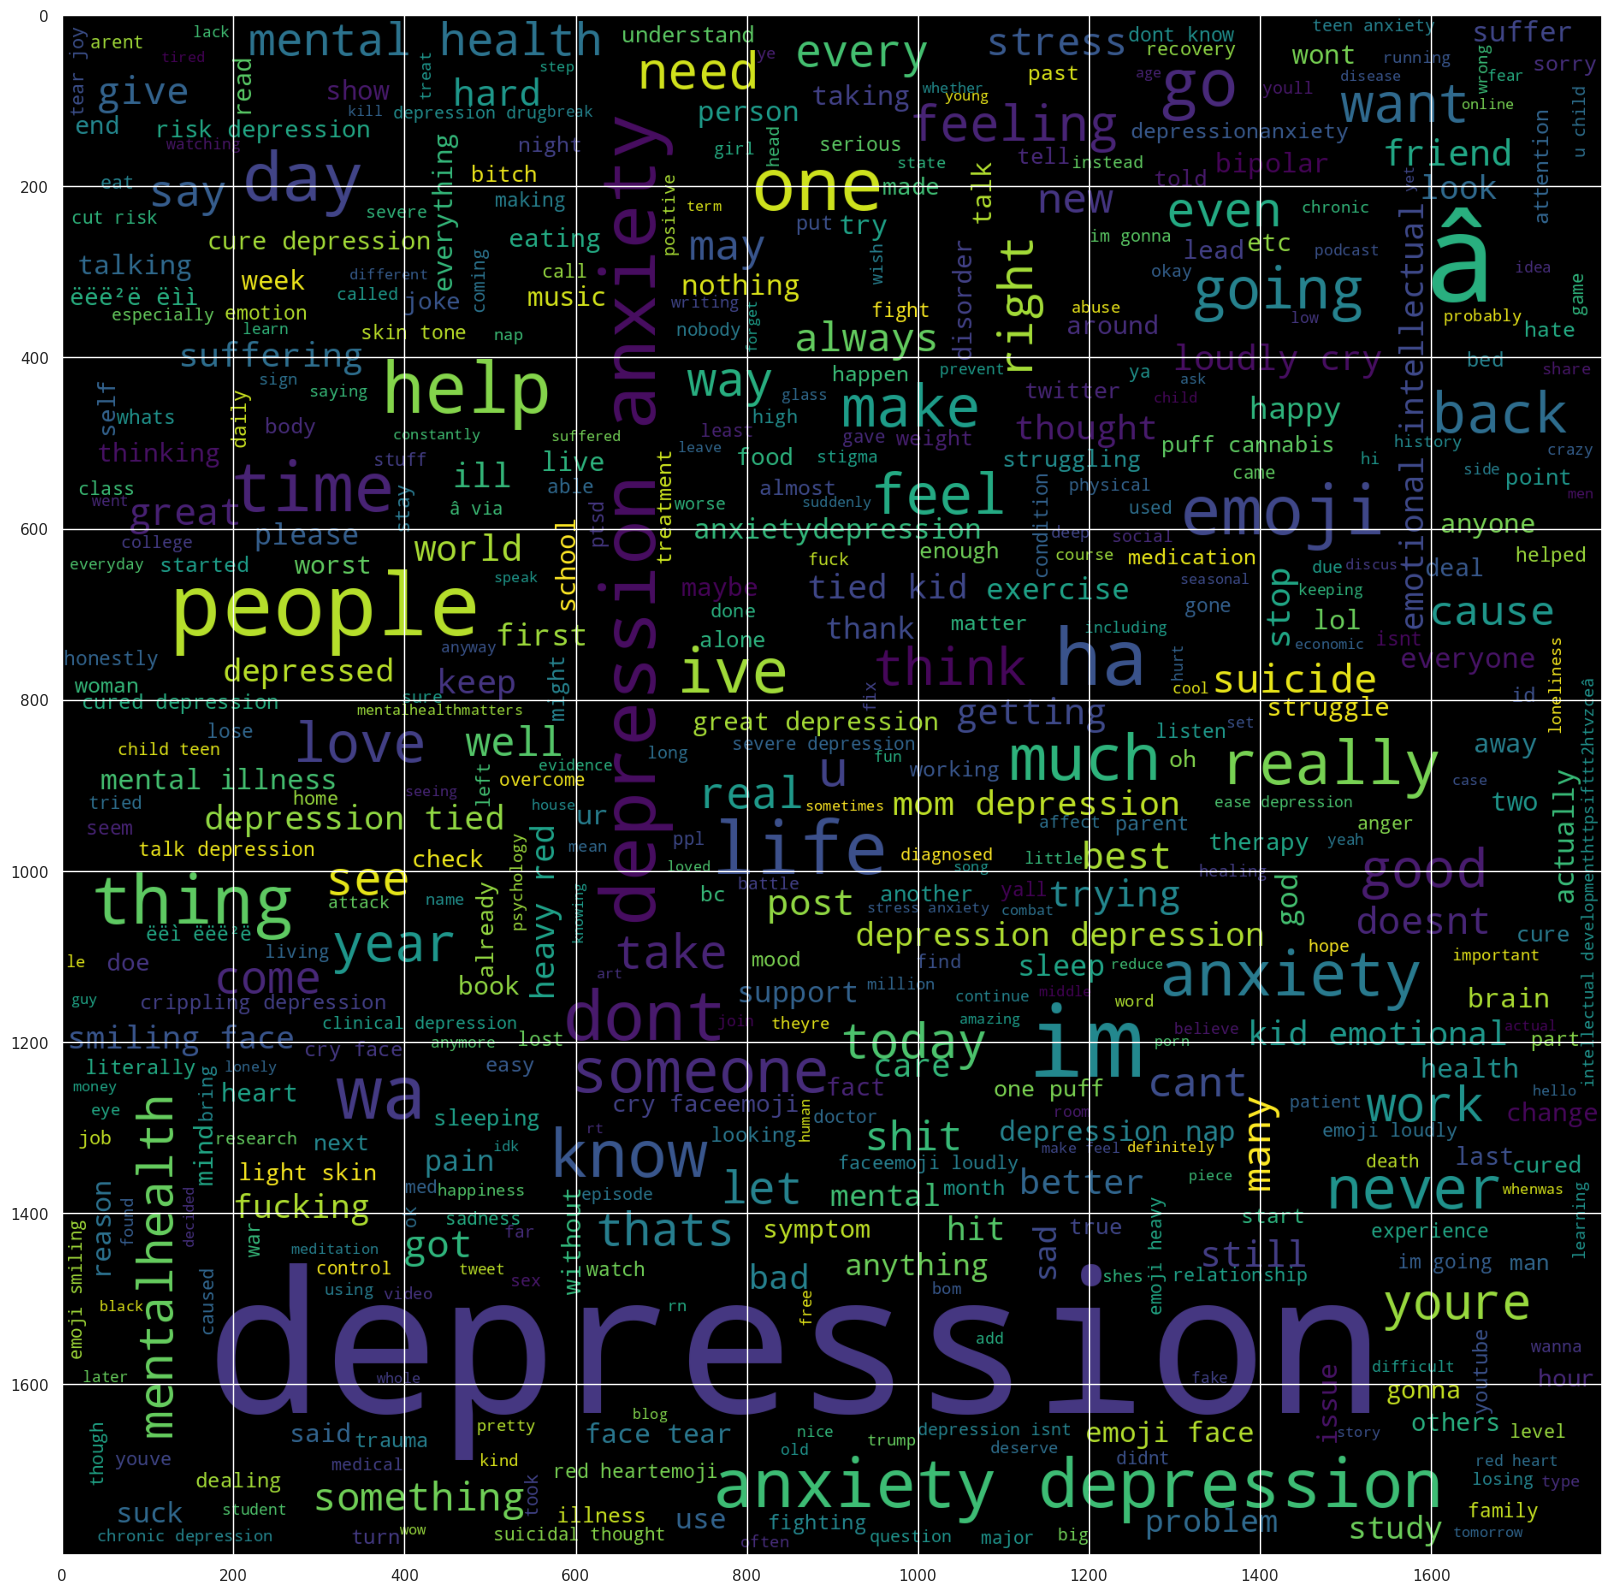

In [43]:

# WordCloud on Depression Sentiments

print("start")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

word_cloud_data = datatotal[datatotal['sentiment'] == -1]['message']
plt.figure(figsize = (20,20))
wc_img_data = WordCloud(max_words = 500, width = 1800 , height = 1800).generate(" ".join(word_cloud_data))
plt.imshow(wc_img_data)
print("done")


start
done


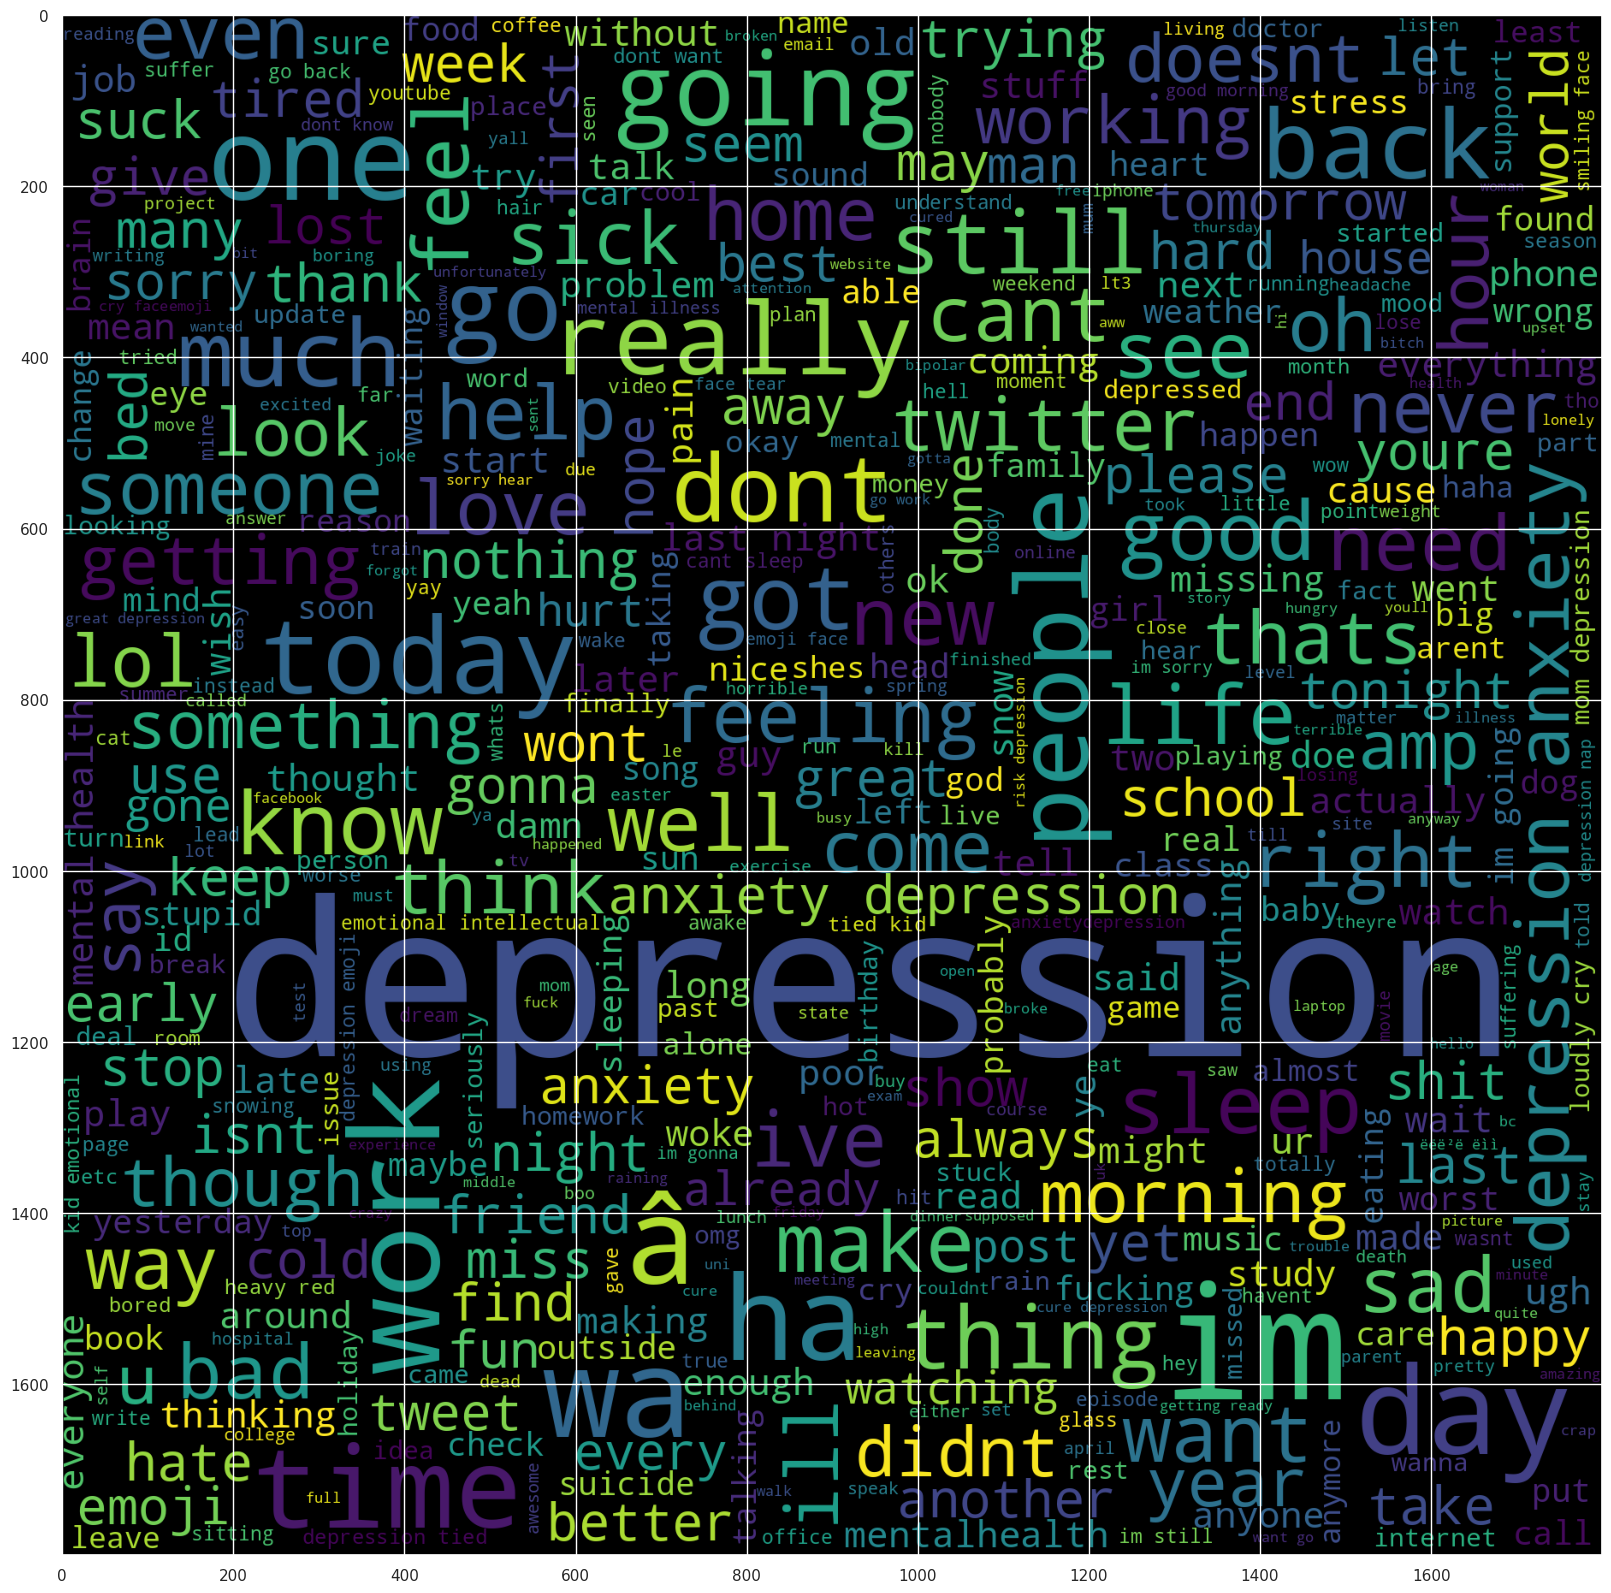

In [44]:
# WordCloud on Depressive + Negative Tweets
print("start")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# print(datatotal)
# print(datatotal[datatotal["sentiment"] == -1]["message"])
word_cloud_data = datatotal[datatotal['sentiment'] <= 0]['message']
plt.figure(figsize = (20,20))
wc_img_data = WordCloud(max_words = 500, width = 1800 , height = 1800).generate(" ".join(word_cloud_data))
plt.imshow(wc_img_data)
print("done")


start
done


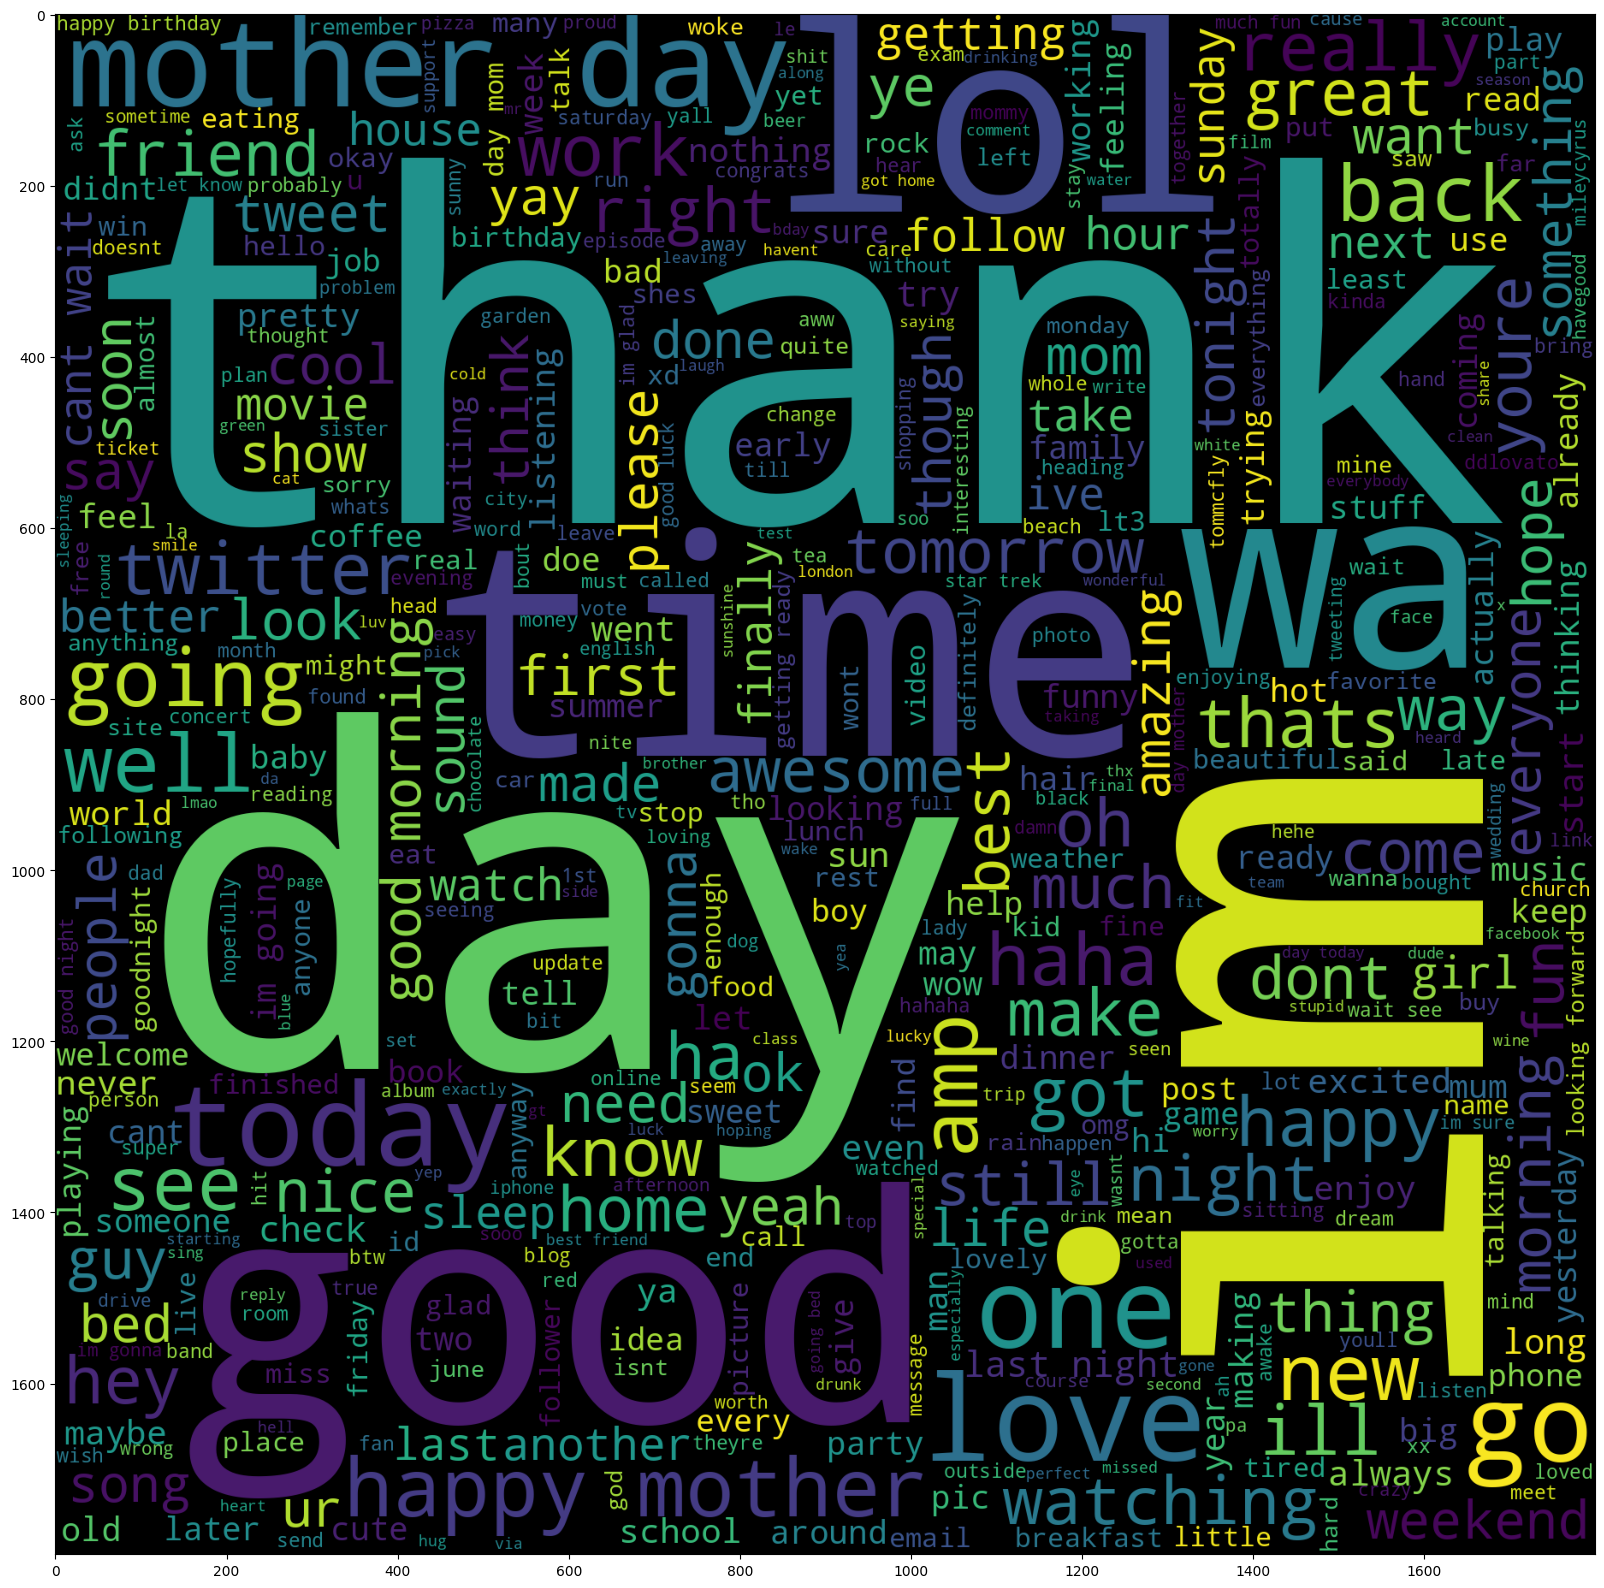

In [10]:
# WordCloud on Positive Tweets
print("start")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# print(datatotal)
# print(datatotal[datatotal["sentiment"] == -1]["message"])
word_cloud_data = datatotal[datatotal['sentiment'] == 4]['message']
plt.figure(figsize = (20,20))
wc_img_data = WordCloud(max_words = 500, width = 1800 , height = 1800).generate(" ".join(word_cloud_data))
plt.imshow(wc_img_data)
print("done")


In [45]:

# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
input_data = datatotal["message"]
output_data = datatotal["sentiment"]
input_train,input_test,output_train,output_test = train_test_split(input_data , output_data, test_size = 0.2,random_state=156654)
print(input_train.shape)
print(input_test.shape)
print(output_train.shape)
print(output_test.shape)

print("--------------------------------------------------------------------------------------")


# Vectorizing input to input into model
print("start")
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser= TfidfVectorizer(ngram_range=(1,2),max_features = 5000)
vectoriser.fit(input_train)
input_train = vectoriser.transform(input_train)
input_test = vectoriser.transform(input_test)
print("done")


(16251,)
(4063,)
(16251,)
(4063,)
--------------------------------------------------------------------------------------
start
done


In [46]:
print("start")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier

print("done")


start
done


In [47]:
def performance_eval(mod,X_test):
    
    print('   ------------ Classification Report -----------')
    output_predicted = mod.predict(input_test)
    print(f'Accuracy : {accuracy_score(output_test,output_predicted)}\n')
    print("done")

    print(classification_report(output_test,output_predicted))
    print("done")

    print(metrics.accuracy_score(output_test,output_predicted))
    print("done")

    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(output_test,output_predicted),annot = True,fmt = 'd')


   ------------ Classification Report -----------
Accuracy : 0.7683977356633029

done
              precision    recall  f1-score   support

          -1       0.99      0.87      0.93       453
           0       0.66      0.51      0.57      1196
           4       0.77      0.88      0.82      2414

    accuracy                           0.77      4063
   macro avg       0.81      0.75      0.77      4063
weighted avg       0.76      0.77      0.76      4063

done
0.7683977356633029
done
   ------------ Confusion Matrix -------------- 


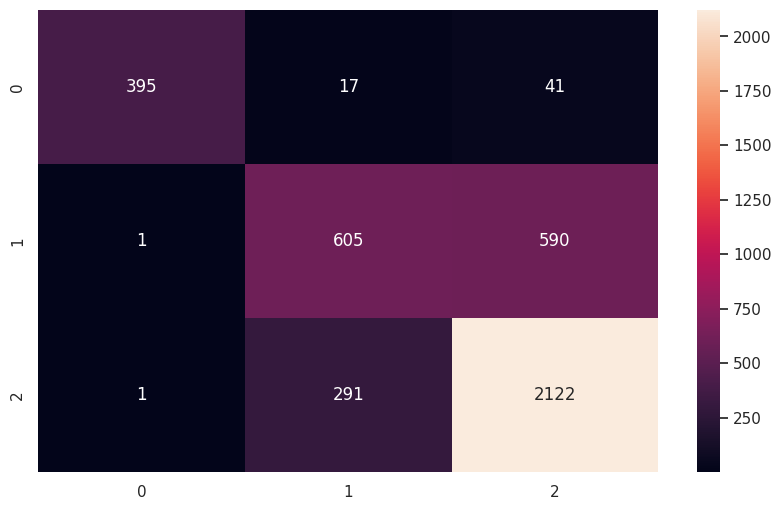

In [48]:
#model= logistic regression
model = LogisticRegression(C=2,max_iter= 1000,n_jobs=-1).fit(input_train, output_train)
performance_eval(model,input_test)


   ------------ Classification Report -----------
Accuracy : 0.7172040364262859

done
              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       453
           0       0.54      0.51      0.52      1196
           4       0.76      0.79      0.77      2414

    accuracy                           0.72      4063
   macro avg       0.75      0.73      0.74      4063
weighted avg       0.71      0.72      0.72      4063

done
0.7172040364262859
done
   ------------ Confusion Matrix -------------- 


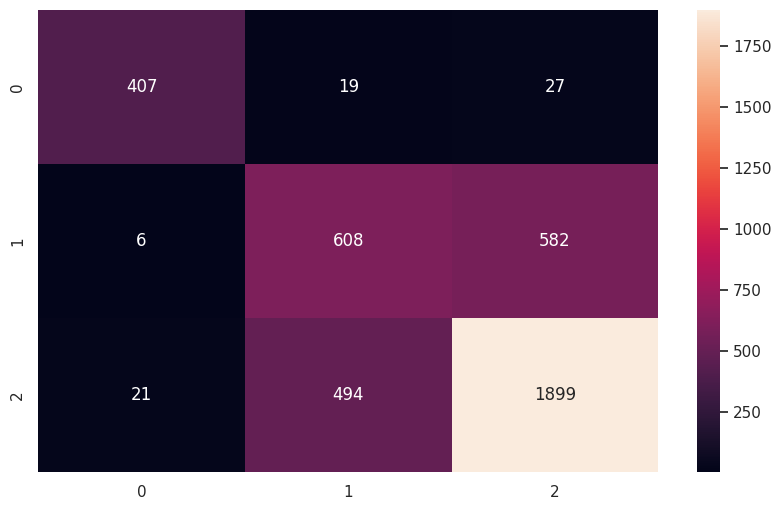

In [49]:

# model_dt = DecisionTreeClassifier()
model_dt = DecisionTreeClassifier()
model_dt.fit(input_train, output_train)
performance_eval(model_dt,input_test)

   ------------ Classification Report -----------
Accuracy : 0.7656903765690377

done
              precision    recall  f1-score   support

          -1       0.99      0.87      0.93       453
           0       0.72      0.40      0.52      1196
           4       0.75      0.93      0.83      2414

    accuracy                           0.77      4063
   macro avg       0.82      0.73      0.76      4063
weighted avg       0.77      0.77      0.75      4063

done
0.7656903765690377
done
   ------------ Confusion Matrix -------------- 


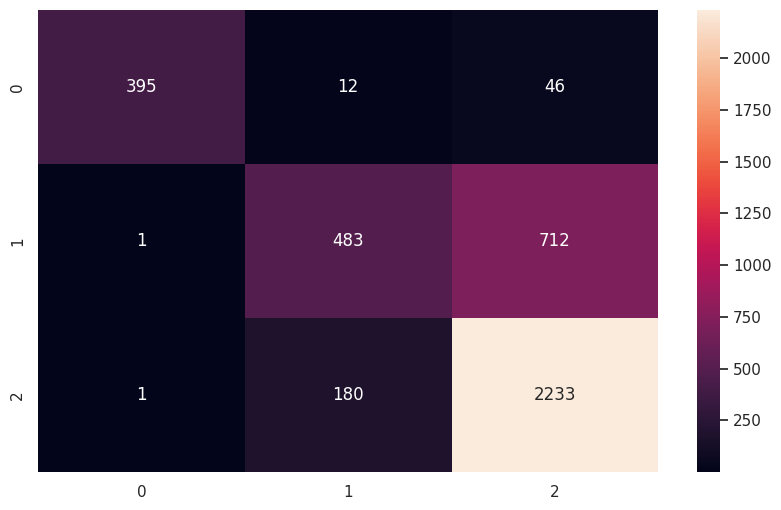

In [50]:

#model_svm

model_svm = SVC()
model_svm.fit(input_train, output_train)
performance_eval(model_svm,input_test)

   ------------ Classification Report -----------
Accuracy : 0.7044056116170317

done
              precision    recall  f1-score   support

          -1       0.96      0.90      0.93       453
           0       0.65      0.08      0.15      1196
           4       0.68      0.98      0.80      2414

    accuracy                           0.70      4063
   macro avg       0.76      0.65      0.63      4063
weighted avg       0.70      0.70      0.62      4063

done
0.7044056116170317
done
   ------------ Confusion Matrix -------------- 


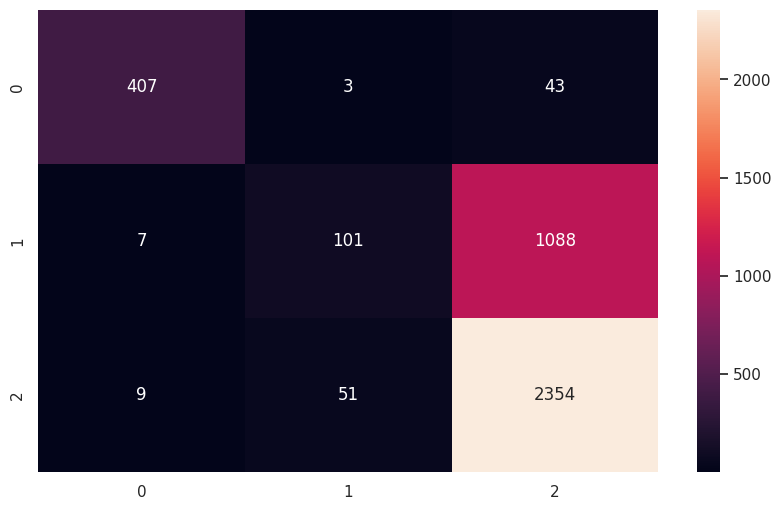

In [51]:
#adaboost model

model_adb = AdaBoostClassifier()
model_adb.fit(input_train, output_train)
performance_eval(model_adb,input_test)

   ------------ Classification Report -----------
Accuracy : 0.7558454344080728

done
              precision    recall  f1-score   support

          -1       0.99      0.90      0.94       453
           0       0.64      0.45      0.53      1196
           4       0.76      0.88      0.81      2414

    accuracy                           0.76      4063
   macro avg       0.79      0.74      0.76      4063
weighted avg       0.75      0.76      0.74      4063

done
0.7558454344080728
done
   ------------ Confusion Matrix -------------- 


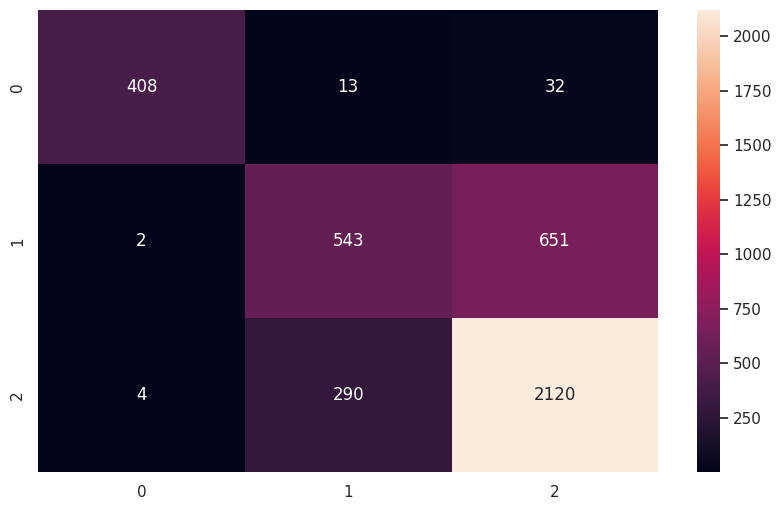

In [52]:
model_rf = RandomForestClassifier()
model_rf.fit(input_train, output_train)
performance_eval(model_rf,input_test)